In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import platform
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
member_data = pd.read_csv('Member_data02.csv')
product_data = pd.read_csv('Product_data.csv')
sales_data = pd.read_csv('Sales_data02.csv', low_memory=False)

In [3]:
member_data = member_data.dropna(axis = 0)
member_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,2.019123e+14,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,2.019123e+14,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,2.019123e+14,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,2.019123e+14,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


In [4]:
product_data.head()

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0


In [5]:
sales_data.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   고객번호       199999 non-null  object 
 6   구매금액       199999 non-null  int64  
 7   결제금액       199999 non-null  int64  
 8   물품대분류      199999 non-null  object 
 9   상품명        199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [7]:
sales_data.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    31857
고객번호             0
구매금액             0
결제금액             0
물품대분류            0
상품명              0
dtype: int64

In [8]:
product_data[product_data['제품단가'] == 0]

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
2896,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X 3,1,0
2898,팬티,하기스 네이처메이드 밤부 5단계 남아 102매(밴드형) X2,1,0
2900,팬티,하기스 네이처메이드 썸머팬티 5단계 공용 68매(팬티형) X 3,6,0
2901,팬티,하기스 네이처메이드 썸머팬티 6단계 공용 58매(팬티형) X 3,1,0


In [9]:
sales_data['주문번호'].nunique()

182426

In [10]:
sac = sales_data[sales_data['주문번호'].str.contains('-')]

In [11]:
sac['고객번호'].nunique()

13185

In [12]:
buy_day = sales_data.sort_values(by = '구매일')


In [13]:
member_data.groupby('유입경로').agg(where = ('자녀여부', 'count'))

,where
유입경로,
검색광고,8259
네이버블로그,22684
네이버카페,5725
매장쿠폰,456
오픈마켓,2022
이마트,218
인스타그램,31167
지인추천,8021
직접검색,1137


In [14]:
# sales_data['구매시월령(수정)'] =  sales_data['구매시월령(수정)'] // 12 +1 -> 나이로 바꾸고 싶을떄

In [15]:
sales_data['구매시월령(수정)'].describe()

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

In [16]:
sales_data['구매시월령(수정)'][0]

4.0

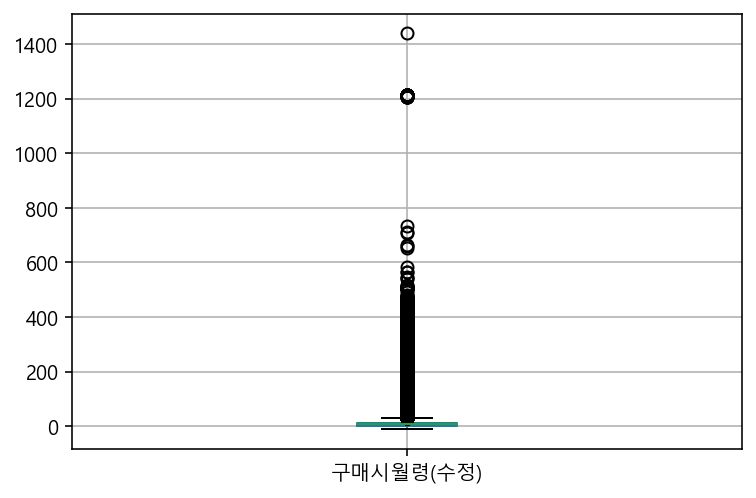

In [17]:
sales_data.boxplot(column = ['구매시월령(수정)'])
plt.show()

In [18]:
sales_data[sales_data['고객번호'] == '201812310749770']

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤


In [19]:
sales_data['구매시월령(수정)'].describe()

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

<AxesSubplot:xlabel='구매시월령(수정)', ylabel='Count'>

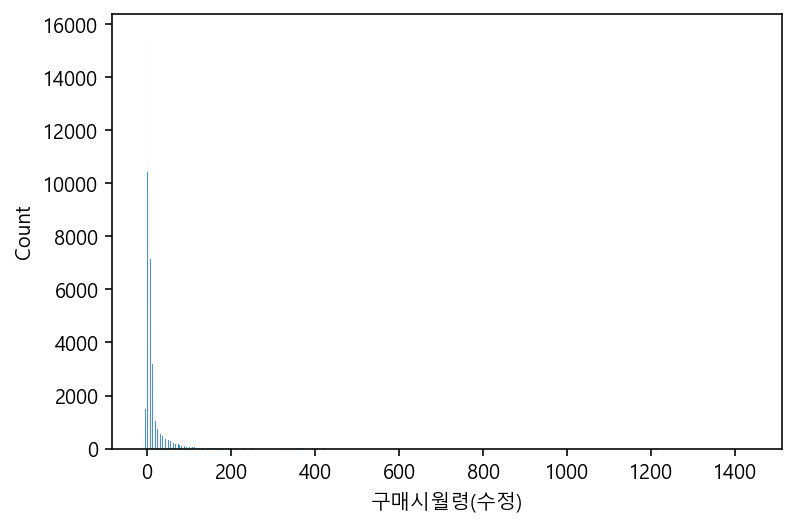

In [20]:
sns.histplot(sales_data, x="구매시월령(수정)")

In [21]:
over_ = sales_data[sales_data['구매시월령(수정)'] >= 8]
over_

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
17,201909272881275,2019-09-28,2019-09-29,2019-10-01,8.0,201812310749784,47360,29952,팬티,하기스 맥스드라이 팬티 3단계 여아 116매(팬티형)
18,202001163303774,2020-01-17,2020-01-18,2020-01-20,12.0,201812310749784,13500,13500,기타,[필리앤임프스] 바디슈트 4종 택1
...,...,...,...,...,...,...,...,...,...,...
199962,20200616152300-27824950140,2020-06-17,2020-06-18,2020-06-20,23.0,20200603223916327908,43900,27372,팬티,2020 하기스 매직팬티 컴포트 썸머 3단계 공용 116매(팬티형) + 보너스 12...
199967,20200628072347-19416984457,2020-06-28,2020-06-29,2020-07-01,14.0,20200614095002296695,6900,5730,체험팩,NEW 하기스 맥스드라이 팬티 4단계 공용 20매(팬티형/체험팩) (EA)
199974,20200620124150-32007118641,2020-06-20,2020-06-21,2020-06-23,175.0,20200620123220059942,3150,2480,FMC,[2020년 3월 신제품] 크리넥스 안심 물티슈 휴대용 20매X3개입 (EA)
199975,20200620124150-32007118641,2020-06-20,2020-06-21,2020-06-23,175.0,20200620123220059942,0,0,FMC,(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...


In [22]:
sales_data['물품대분류'].unique()

array(['더블하트', '팬티', 'FMC', '기저귀', '체험팩', 'FC', '기타', '물티슈', 'SKC', 'SrC'],
      dtype=object)

In [23]:
product_data['물품대분류'].unique()

array(['FC', 'FMC', 'SKC', 'SrC', '기저귀', '기타', '더블하트', '물티슈', '체험팩', '팬티'],
      dtype=object)

In [24]:
product_data[product_data['물품대분류'] == 'FMC']

,물품대분류,상품명,물품판매량,제품단가
255,FMC,(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...,30,0
256,FMC,(1+1) 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 2...,17,0
257,FMC,(핫딜위크/1+1) 스카트 주방 위생 세트,12,0
258,FMC,(핫딜위크/1+1) 크리넥스 칼로리라이트 키친타월 55매 X 3롤,6,0
259,FMC,[1+1] 스카트 항균 프레쉬블루 빨아쓰는 행주타월 45매 X 4롤,30,24800
...,...,...,...,...
475,FMC,크리넥스 황사마스크 뉴디자인플러스 대형 3P,209,11866
476,FMC,크리넥스 황사마스크 뉴디자인플러스 소형 3P,309,16037
477,FMC,크리넥스 황사용 마스크 플러스 대형10P,222,19871
478,FMC,크리넥스/스카트 세트,54,38100


In [25]:
# member_data[member_data['ID'].str.contains('2018')]
member_data[member_data['ID'] == 2018]

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부


In [26]:
member_data['ID'].astype('float').max()

201912291058171.0

In [27]:
member_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,2.019123e+14,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,2.019123e+14,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,2.019123e+14,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,2.019123e+14,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


In [28]:
member_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.6+ MB


In [29]:
sales_data['고객번호'] = sales_data['고객번호'].astype('float')

In [30]:
df = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호')
merge_outer = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호', how = 'left')

In [31]:
merge_outer['ID'] = merge_outer['ID'].astype('str')

In [32]:
product_data['total'] = product_data['물품판매량'] * product_data['제품단가']

In [33]:
product_data['total'].max()

194683790

In [34]:
product_data[product_data['total'] == 194683790]

,물품대분류,상품명,물품판매량,제품단가,total
768,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형),3010,64679,194683790


In [35]:
no_outer = merge_outer[merge_outer['자녀여부'] == 'No']
yes_outer = merge_outer[merge_outer['자녀여부'] == 'Yes']

In [36]:
no_outer[no_outer['구매시월령(수정)'] >= 90]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
1923,201901151902351,2019-01-15,2019-01-16,2019-01-19,117.0,2.019010e+14,19800,13751,SKC,그린핑거 마이키즈 로션 대용량 330ml,201901030751620.0,남,미혼,전남,31.0,우리은행,네이버블로그,No
1924,201901151902351,2019-01-15,2019-01-16,2019-01-19,117.0,2.019010e+14,2600,2574,FC,좋은느낌 순수 울트라 날개 중형 18개입,201901030751620.0,남,미혼,전남,31.0,우리은행,네이버블로그,No
2723,201902272089585,2019-02-28,2019-03-01,2019-03-05,314.0,2.019010e+14,12900,8157,더블하트,더블하트 SofTouch 모유실감 젖꼭지 S (2입),201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
2724,201903312221678,2019-04-01,2019-04-02,2019-04-04,316.0,2.019010e+14,9500,7137,더블하트,더블하트 다기능 빨대 브러쉬,201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
2725,201910243005683,2019-10-25,2019-10-26,2019-10-28,322.0,2.019010e+14,12900,9187,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입),201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197214,201912193204396,2019-12-20,2019-12-21,2019-12-24,159.0,2.019122e+14,52800,30674,기저귀,하기스 보송보송 3단계 공용 186매(밴드형),201912191052918.0,여,미혼,서울,32.0,미래에셋증권,오픈마켓,No
197326,201912193206380,2019-12-20,2019-12-21,2019-12-23,108.0,2.019122e+14,7700,5227,FMC,크리넥스 안심 프리미엄 3겹 키친타월 140매 X 4롤,201912191053196.0,여,기혼,서울,31.0,BC카드,지인추천,No
197590,202001273336894,2020-01-27,2020-01-28,2020-01-30,184.0,2.019122e+14,12900,8064,FMC,크리넥스 3겹 수프림 소프트 27m 12롤,201912191053644.0,여,미혼,충북,33.0,광주은행,인스타그램,No
197997,201912203220117,2019-12-21,2019-12-22,2019-12-24,92.0,2.019122e+14,22500,12474,SKC,그린핑거 마이키즈 샴푸 대용량 500ml,201912201054504.0,여,기혼,경남,27.0,BC카드,검색광고,No


In [37]:
yes_outer[yes_outer['구매시월령(수정)'] >= 90]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
318,202001093283175,2020-01-10,2020-01-11,2020-01-13,167.0,2.019010e+14,3000,3000,체험팩,맘큐 허그박스,201901010750103.0,여,기혼,경기,32.0,국민은행,검색광고,Yes
439,201901011864727,2019-01-01,2019-01-02,2019-01-04,98.0,2.019010e+14,23800,18848,물티슈,릴리유 무민 리미티드 아기물티슈 캡형 80매X10팩,201901010750193.0,남,기혼,부산,33.0,농협회원조합,네이버카페,Yes
447,201903312218708,2019-03-31,2019-04-01,2019-04-03,101.0,2.019010e+14,12000,8266,FMC,“스페인하숙에 나온 바로 그 행주” 스카트 항균 프레쉬블루 행주타올 45매 X 4롤,201901010750202.0,여,기혼,서울,31.0,신한은행,검색광고,Yes
448,201908302782324,2019-08-30,2019-08-31,2019-09-02,106.0,2.019010e+14,17600,15324,FMC,크리넥스 NEW 디럭스 미니_카카오 230매 X 6개입,201901010750202.0,여,기혼,서울,31.0,신한은행,검색광고,Yes
457,201903312221229,2019-04-01,2019-04-02,2019-04-04,341.0,2.019010e+14,2000,1584,FMC,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,201901010750221.0,여,기혼,부산,35.0,국민은행,인스타그램,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198319,202002123396582,2020-02-12,2020-02-13,2020-02-15,143.0,2.019122e+14,54480,37622,기저귀,하기스 네이처메이드 밤부 2단계 여아 156매(밴드형),201912221055286.0,여,기혼,경남,38.0,농협회원조합,인스타그램,Yes
198769,201912253234186,2019-12-25,2019-12-26,2019-12-28,112.0,2.019123e+14,16500,10286,SKC,그린핑거 힘센 보습 울트라크림 300g,201912251056311.0,여,기혼,경기,34.0,신한은행,오픈마켓,Yes
199023,202001313356450,2020-01-31,2020-02-01,2020-02-05,156.0,2.019123e+14,6040,4851,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),201912261056947.0,여,기혼,경북,34.0,국민은행,네이버블로그,Yes
199024,20200623165452-20315027851,2020-06-24,2020-06-25,2020-06-27,161.0,2.019123e+14,5900,5841,체험팩,NEW 하기스 네이처메이드 팬티 3단계 남아 20매(팬티형/체험팩) (EA),201912261056947.0,여,기혼,경북,34.0,국민은행,네이버블로그,Yes


In [38]:
product = product_data[['물품대분류', '상품명', '제품단가']]

In [39]:
df = df.merge(product, on = ['물품대분류', '상품명'])

In [40]:
df['배송시작일']=pd.to_datetime(df['배송시작일'],format = '%Y-%m-%d')
df['구매일']=pd.to_datetime(df['구매일'],format = '%Y-%m-%d')
df['배송완료일']=pd.to_datetime(df['배송완료일'],format = '%Y-%m-%d')

In [41]:
# Yes : 1, No : 0
df['자녀여부'] = df['자녀여부'].replace('Yes', 1).replace('No', 0)

In [42]:
df['배송기간'] = df['배송완료일'] -df['배송시작일']
df['구매에서 배송완료까지'] = df['배송완료일']- df['구매일']
df['배송시작기간'] = df['배송시작일'] - df['구매일']

df.drop(['주문번호', 'ID'], axis = 1, inplace = True)

In [43]:
# 여성 : 1, 남성 : 0
# 기혼 : 1, 미혼 : 0
# 출산예정 : 0
df['성별'] = df['성별']. replace('여', 1).replace('남', 0)
df['결혼유무'] = df['결혼유무'].replace('기혼', 1).replace('미혼', 0)
df['고객번호'].astype('float64')
df['구매시월령(수정)'] = df['구매시월령(수정)'].fillna(0)
df[df['구매시월령(수정)'] < 0]

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
80,2019-01-31,2019-02-01,2019-02-03,-1.0,2.019011e+14,12900,7662,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,충남,27.0,롯데카드,네이버블로그,1,20583,2 days,3 days,1 days
88,2019-12-21,2019-12-22,2019-12-24,-5.0,2.019011e+14,12900,10216,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,인천,33.0,삼성카드,인스타그램,1,20583,2 days,3 days,1 days
130,2019-01-17,2019-01-18,2019-01-21,-1.0,2.019011e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,부산,30.0,현대카드,지인추천,1,20583,3 days,4 days,1 days
136,2019-01-22,2019-01-23,2019-01-25,-1.0,2.019011e+14,12900,10206,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,32.0,삼성카드,네이버블로그,1,20583,2 days,3 days,1 days
158,2019-01-31,2019-02-01,2019-02-04,-3.0,2.019011e+14,12900,7662,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,부산,32.0,하나은행,지인추천,1,20583,3 days,4 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199486,2020-04-03,2020-04-04,2020-04-06,-1.0,2.019102e+14,59000,59000,기타,[에불로보] 프랑스 국민 애착인형 액티비티 기린 + 딸랑이 인형증정 (택1),1,0,충북,40.0,농협회원조합,네이버블로그,0,59000,2 days,3 days,1 days
199503,2019-11-08,2019-11-09,2019-11-11,-3.0,2.019103e+14,29900,29900,기타,[도담도담오가닉] 아기띠워머 외출용 3종 기획 특선-브라운,1,1,대전,33.0,국민은행,오픈마켓,1,29900,2 days,3 days,1 days
199512,2019-12-18,2019-12-19,2019-12-22,-3.0,2.019111e+14,14500,14500,기타,[필리앤임프스] 신생아 속싸개 6종 택1,1,1,서울,35.0,농협회원조합,인스타그램,1,14500,3 days,4 days,1 days
199529,2020-07-09,2020-07-10,2020-07-12,-2.0,2.019112e+14,0,0,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X2,1,1,서울,31.0,농협회원조합,네이버블로그,1,0,2 days,3 days,1 days


In [44]:
def minus_change(i):
    if i < 0:
        return 0
    else:
        return i

df['구매시월령(수정)'] = df['구매시월령(수정)'].apply(minus_change)

In [45]:
data = pd.read_csv('eda_data.csv')

In [46]:
data['고객번호'][199582]

201912271057299.0

In [47]:
keyword = '유아|맘|모유|엄마|하기스|젖|아기|아가|베이비|콧물|그린핑거|핑크퐁|더블하트|누들앤부|출산|도담도담|드시모네|디어에코|라밀로우|룰라러브|리틀누|마마|마더|수유|맘마|매직캔|이유식|먼치킨|싸개|메릴린|몽슈레|신생아|유모차|턱받이|베베|보보앤부|본토이|브라이트|브리카|비박스|비츠|뽀드|뿌띠|쁘띠|치발기|실리만|페어리|야마토야|에르고|에불로보|오볼|원펀|율그란|카시트|필리앤|스페셜기프트SET|마밍|릴리유|굿나이트'

def change_kids(x):
    keyword = '유아|맘|모유|엄마|하기스|젖|아기|아가|베이비|콧물|그린핑거|핑크퐁|더블하트|누들앤부|출산|도담도담|드시모네|디어에코|라밀로우|룰라러브|리틀누|마마|마더|수유|맘마|매직캔|이유식|먼치킨|싸개|메릴린|몽슈레|신생아|유모차|턱받이|베베|보보앤부|본토이|브라이트|브리카|비박스|비츠|뽀드|뿌띠|쁘띠|치발기|실리만|페어리|야마토야|에르고|에불로보|오볼|원펀|율그란|카시트|필리앤|스페셜기프트SET|마밍|릴리유|굿나이트'
    if keyword in str(x):
        return "Yes"
    else:
        return "No"


In [48]:
df['상품명'].apply(change_kids)

0         No
1         No
2         No
3         No
4         No
          ..
199578    No
199579    No
199580    No
199581    No
199582    No
Name: 상품명, Length: 199583, dtype: object

In [49]:
before_year = df[df['구매일'] < '2020-01-01']
current_year = df[df['구매일'] > '2020-01-01']

In [50]:
current_year

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
14,2020-03-21,2020-03-22,2020-03-24,5.0,2.019010e+14,12900,9702,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,36.0,신한은행,검색광고,1,20583,2 days,3 days,1 days
15,2020-04-01,2020-04-02,2020-04-04,5.0,2.019010e+14,12900,8167,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,36.0,신한은행,검색광고,1,20583,2 days,3 days,1 days
54,2020-02-22,2020-02-23,2020-02-25,5.0,2.019011e+14,12900,7840,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,경기,35.0,신한은행,네이버블로그,0,20583,2 days,3 days,1 days
156,2020-03-22,2020-03-23,2020-03-25,6.0,2.019011e+14,12900,10216,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,0,서울,36.0,롯데카드,지인추천,0,20583,2 days,3 days,1 days
157,2020-01-08,2020-01-09,2020-01-11,14.0,2.019011e+14,12900,7662,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,경남,32.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days


In [51]:
print(len(before_year))
print(len(current_year))

137438
61876


In [52]:
df['배송기간'].describe()

count                       199583
mean     2 days 08:53:25.355165520
std      0 days 14:38:54.058152587
min                2 days 00:00:00
25%                2 days 00:00:00
50%                2 days 00:00:00
75%                3 days 00:00:00
max                4 days 00:00:00
Name: 배송기간, dtype: object

In [53]:
return_customer = before_year.groupby('고객번호').agg(count = ('고객번호', 'count'))
return_customer = return_customer[return_customer['count'] >= 2]

In [54]:
total = data.groupby('고객번호').agg(count =( '고객번호', 'count'))
total_re_percent =len(total[total['count'] >= 2]) / len(total) * 100
total_re_percent
print(f'전체 재구매율은 {round(total_re_percent, 2)}% 입니다.')

전체 재구매율은 44.7% 입니다.


In [55]:
return_customer

,count
고객번호,
2.018123e+14,2
2.018123e+14,5
2.018123e+14,3
2.018123e+14,14
2.018123e+14,4
...,...
2.019123e+14,2
2.019123e+14,2
2.019123e+14,2


In [56]:
result_before = len(return_customer) / len(before_year) * 100

In [57]:
result_before

19.669960272995823

In [58]:
current_year

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
14,2020-03-21,2020-03-22,2020-03-24,5.0,2.019010e+14,12900,9702,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,36.0,신한은행,검색광고,1,20583,2 days,3 days,1 days
15,2020-04-01,2020-04-02,2020-04-04,5.0,2.019010e+14,12900,8167,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,36.0,신한은행,검색광고,1,20583,2 days,3 days,1 days
54,2020-02-22,2020-02-23,2020-02-25,5.0,2.019011e+14,12900,7840,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,경기,35.0,신한은행,네이버블로그,0,20583,2 days,3 days,1 days
156,2020-03-22,2020-03-23,2020-03-25,6.0,2.019011e+14,12900,10216,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,0,서울,36.0,롯데카드,지인추천,0,20583,2 days,3 days,1 days
157,2020-01-08,2020-01-09,2020-01-11,14.0,2.019011e+14,12900,7662,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,경남,32.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days


In [59]:
current_customer = current_year.groupby('고객번호').agg(count = ('고객번호', 'count'))
return_current = current_customer[current_customer['count'] >= 2]

In [60]:
result_current = len(return_current) / len(current_year) * 100
result_current

21.431572823065487

In [61]:
how_day = data.groupby(['거주지역', '배송기간', '물품대분류']).agg(count = ('고객번호', 'count')).reset_index()
how_day[how_day['물품대분류'] == '기저귀']

,거주지역,배송기간,물품대분류,count
3,강원,2 days,기저귀,2009
12,강원,3 days,기저귀,660
21,강원,4 days,기저귀,204
31,경기,2 days,기저귀,4976
40,경기,3 days,기저귀,1590
50,경기,4 days,기저귀,465
59,경남,2 days,기저귀,857
69,경남,3 days,기저귀,287
78,경남,4 days,기저귀,90
88,경북,2 days,기저귀,1033


In [62]:
day_over = how_day[how_day['배송기간'] >= '3']
over = day_over[day_over['물품대분류'] == '기저귀']
over['total'] = over['count'].cumsum()
over

C:\Users\Song\AppData\Local\Temp\ipykernel_26008\1886052910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over['total'] = over['count'].cumsum()


,거주지역,배송기간,물품대분류,count,total
12,강원,3 days,기저귀,660,660
21,강원,4 days,기저귀,204,864
40,경기,3 days,기저귀,1590,2454
50,경기,4 days,기저귀,465,2919
69,경남,3 days,기저귀,287,3206
78,경남,4 days,기저귀,90,3296
97,경북,3 days,기저귀,327,3623
106,경북,4 days,기저귀,109,3732
125,광주,3 days,기저귀,193,3925
134,광주,4 days,기저귀,57,3982


In [63]:
double_heart = data[data['상품명'].str.contains('더블하트')]
double_heart

,Unnamed: 0,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,...,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
0,0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days
1,1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
2,2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days
3,3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days
4,4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199511,199511,2020-08-01,2020-08-02,2020-08-04,2.0,2.019121e+14,17600,17420,더블하트,더블하트 베이비 크림 100ml (EA),...,1,전북,40.0,국민은행,네이버카페,1,17600,2 days,3 days,1 days
199525,199525,2020-05-17,2020-05-18,2020-05-21,3.0,2.019112e+14,33120,31140,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),...,1,충남,34.0,삼성카드,네이버블로그,1,33120,3 days,4 days,1 days
199526,199526,2020-05-28,2020-05-29,2020-05-31,4.0,2.019121e+14,33120,27210,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),...,1,서울,35.0,부산은행,지인추천,1,33120,2 days,3 days,1 days
199527,199527,2020-07-03,2020-07-04,2020-07-06,4.0,2.019122e+14,33120,31120,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),...,1,경기,36.0,롯데카드,인스타그램,1,33120,2 days,3 days,1 days


In [64]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [65]:
delay_delivery_current = current_year[current_year['배송기간'] > '2 days']
delay_delivey_percent = len(delay_delivery_current) / len(current_year) * 100
delay_delivey_percent

30.136078608830562

In [66]:
delay_delivery_before = before_year[before_year['배송기간'] > '2 days']
delay_delivery_percent_before = len(delay_delivery_before) / len(before_year) * 100
delay_delivery_percent_before

30.055734221976454

In [67]:
data

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days


In [68]:
data

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days


In [75]:
data['물품구매량'] =  data['구매금액']//data['제품단가']

In [80]:
data[data['물품구매량'] == 0]['상품명'].nunique()

1598

In [114]:
count_zero = data[data['물품구매량'] == 0]
# count_zero.groupby('물품대분류').agg('결제금액', 'sum')
count_zero

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days,0.0
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days,0.0
5,2019-03-25,2019-03-26,2019-03-28,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,경기,32.0,국민은행,네이버블로그,1,20583,2 days,3 days,1 days,0.0
8,2019-04-11,2019-04-12,2019-04-14,4.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),0,...,충남,31.0,현대카드,인스타그램,0,20583,2 days,3 days,1 days,0.0
9,2019-03-21,2019-03-22,2019-03-25,4.0,2.019010e+14,12900,10206,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,30.0,신한카드,네이버블로그,1,20583,3 days,4 days,1 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199351,2020-05-28,2020-05-29,2020-05-31,6.0,2.019101e+14,16900,16900,기타,[맘마밀] 안심이유식 6개월 단호박과 소고기 100g 10팩,1,...,서울,29.0,국민은행,인스타그램,1,18233,2 days,3 days,1 days,0.0
199370,2019-12-26,2019-12-27,2019-12-29,0.0,2.019092e+14,13500,13500,기타,[실리만] 실리콘 욕실 양치컵 WSS303,1,...,경기,35.0,부산은행,인스타그램,0,20250,2 days,3 days,1 days,0.0
199372,2020-02-27,2020-02-28,2020-03-03,7.0,2.019091e+14,8900,8900,기타,[실리만] 실리콘 칫솔치발기 WSB241 연핑크,1,...,대구,30.0,신한은행,지인추천,1,11200,4 days,5 days,1 days,0.0
199408,2020-02-24,2020-02-25,2020-02-27,3.0,2.019093e+14,2100,2100,기타,[실리만] 실리콘 펭귄 핸드폰 거치대 WSA102 노랑,1,...,전북,35.0,국민카드,인스타그램,1,2800,2 days,3 days,1 days,0.0


In [94]:
count_over1 = data[data['물품구매량'] > 0]
group_sum_over1 = count_over1.groupby('물품대분류').agg(sum_data = ('결제금액', 'sum'))
group_sum_over1

,sum_data
물품대분류,
FC,53256980
FMC,111452227
SKC,39960689
SrC,167840
기저귀,483727222
기타,72821001
더블하트,248851681
물티슈,29162264
체험팩,174271612


In [95]:
group_sum_zero = count_zero.groupby('물품대분류').agg(sum_data_over1 = ('결제금액', 'sum'))
group_sum_zero

,sum_data_over1
물품대분류,
FC,39035203
FMC,188318689
SKC,76953049
SrC,44640
기저귀,1088664467
기타,52771031
더블하트,392829447
물티슈,103426927
체험팩,5677185


<AxesSubplot:xlabel='물품대분류', ylabel='margin'>

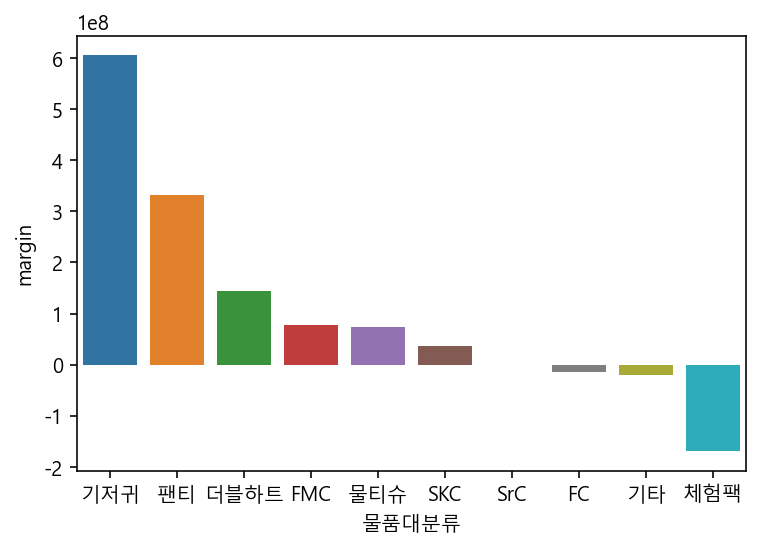

In [106]:
total_sep = pd.concat([group_sum_over1, group_sum_zero], axis = 1)
total_sep['margin'] = total_sep['sum_data_over1'] - total_sep['sum_data']
total_sep = total_sep.sort_values(by = 'margin', ascending = False).reset_index()

sns.barplot(data=total_sep, x = '물품대분류', y = 'margin')

In [108]:
data[data['물품대분류'] == '기저귀']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
3464,2019-05-13,2019-05-14,2019-05-16,66.0,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,부산,32.0,하나은행,네이버블로그,1,65117,2 days,3 days,1 days,0.0
3465,2019-04-16,2019-04-17,2019-04-19,1.0,2.019010e+14,59520,40689,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,전북,29.0,기업은행,지인추천,1,65117,2 days,3 days,1 days,0.0
3466,2019-12-15,2019-12-16,2019-12-19,8.0,2.019010e+14,59520,35968,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,대구,35.0,신한카드,네이버블로그,0,65117,3 days,4 days,1 days,0.0
3467,2019-08-01,2019-08-02,2019-08-04,6.0,2.019010e+14,119040,81464,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,대구,34.0,하나은행,인스타그램,0,65117,2 days,3 days,1 days,1.0
3468,2019-05-17,2019-05-18,2019-05-20,4.0,2.019011e+14,59520,43227,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,서울,38.0,농협회원조합,네이버블로그,1,65117,2 days,3 days,1 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199545,2020-04-06,2020-04-07,2020-04-09,1.0,2.019121e+14,178560,123151,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,경기,32.0,새마을금고,인스타그램,1,178560,2 days,3 days,1 days,1.0
199546,2020-04-06,2020-04-07,2020-04-10,3.0,2.019123e+14,178560,121035,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,서울,28.0,롯데카드,인스타그램,1,178560,3 days,4 days,1 days,1.0
199557,2020-05-14,2020-05-15,2020-05-18,5.0,2.019122e+14,0,0,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 3,1,...,경기,34.0,신협중앙회,검색광고,1,0,3 days,4 days,1 days,NaN
199569,2020-04-13,2020-04-14,2020-04-17,0.0,2.019122e+14,169200,111883,기저귀,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3,0,...,서울,38.0,신한은행,네이버카페,1,169200,3 days,4 days,1 days,1.0


In [109]:
data[data['물품대분류'] == '팬티']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
2761,2020-02-20,2020-02-21,2020-02-23,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,인천,37.0,국민은행,인스타그램,1,53648,2 days,3 days,1 days,0.0
2762,2020-03-31,2020-04-01,2020-04-04,21.0,2.019010e+14,51200,34637,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,서울,32.0,롯데카드,인스타그램,1,53648,3 days,4 days,1 days,0.0
2763,2020-03-08,2020-03-09,2020-03-13,14.0,2.019011e+14,51200,33508,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,경북,33.0,신한은행,인스타그램,1,53648,4 days,5 days,1 days,0.0
2764,2020-07-21,2020-07-22,2020-07-24,18.0,2.019011e+14,44300,22570,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,경북,33.0,신한은행,인스타그램,1,53648,2 days,3 days,1 days,0.0
2765,2020-02-06,2020-02-07,2020-02-09,10.0,2.019011e+14,51200,34051,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,서울,34.0,기업은행,검색광고,1,53648,2 days,3 days,1 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199500,2020-05-28,2020-05-29,2020-05-31,4.0,2.019122e+14,77900,49208,팬티,하기스 네이처메이드 오가닉 3단계 남아 128매(밴드형),1,...,제주,33.0,우리은행,인스타그램,1,77900,2 days,3 days,1 days,1.0
199529,2020-07-09,2020-07-10,2020-07-12,0.0,2.019112e+14,0,0,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X2,1,...,서울,31.0,농협회원조합,네이버블로그,1,0,2 days,3 days,1 days,NaN
199531,2019-12-06,2019-12-07,2019-12-09,24.0,2.019113e+14,142080,91773,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,1,...,전남,33.0,농협회원조합,인스타그램,1,142080,2 days,3 days,1 days,1.0
199532,2019-12-07,2019-12-08,2019-12-10,23.0,2.019121e+14,142080,92700,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,1,...,서울,33.0,롯데카드,인스타그램,1,142080,2 days,3 days,1 days,1.0


In [122]:
data.groupby(['고객번호']).agg(count = ('고객번호', 'count'))

,count
고객번호,
2.018123e+14,2
2.018123e+14,1
2.018123e+14,1
2.018123e+14,2
2.018123e+14,1
...,...
2.019123e+14,1
2.019123e+14,2
2.019123e+14,4


In [139]:
produt_total = product_data.groupby('물품대분류').agg(product_storage = ('물품판매량', 'sum'))

In [140]:
def zero_change(x):
    if x == 0:
        return 1
    else:
        return x

data['물품구매량'] = data['물품구매량'].apply(zero_change)

In [141]:
customer_total = data.groupby('물품대분류').agg(customer_needs = ('물품구매량', 'sum'))

In [142]:
total_sells = pd.concat([produt_total, customer_total], axis = 1)

In [148]:
total_sells= total_sells.reset_index()
total_sells['shortage'] = total_sells['product_storage'] - total_sells['customer_needs']


ValueError: cannot insert level_0, already exists

In [150]:
total_sells.drop(['level_0', 'index'], axis = 1, inplace = True)
total_sells

,물품대분류,product_storage,customer_needs,shortage
0,FC,12436,13510.0,-1074.0
1,FMC,25976,27899.0,-1923.0
2,SKC,9379,9761.0,-382.0
3,SrC,14,14.0,0.0
4,기저귀,35404,36279.0,-875.0
5,기타,7893,7660.0,233.0
6,더블하트,37294,38979.0,-1685.0
7,물티슈,8455,8692.0,-237.0
8,체험팩,35488,35373.0,115.0
9,팬티,27660,27925.0,-265.0


In [151]:
product_data

,물품대분류,상품명,물품판매량,제품단가,total
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0,0
...,...,...,...,...,...
3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360,189440
3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040,1278720
3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861,1136637
3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994,5588514


In [152]:
data

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days,1.0
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days,1.0
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days,1.0
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days,1.0
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,...,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days,1.0
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,...,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days,1.0
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,...,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days,1.0
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,...,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days,1.0
